## 309 - How to Deal with Missing Data Part 2 - Using NaN and NA

[Youtube](https://www.youtube.com/watch?v=rEQNzrPlYYg)

[Colorado ASOS Data](https://mesonet.agron.iastate.edu/request/download.phtml?network=CO_ASOS)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('BDU.csv', usecols = [1, 2, 3, 4, 5, 6, 8])

/tmp/ipykernel_428058/2092233062.py:1: DtypeWarning: Columns (2,3,4,5,6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('BDU.csv', usecols = [1, 2, 3, 4, 5, 6, 8])


In [3]:
df.head()

,valid,tmpf,dwpf,relh,drct,sknt,alti
0,2010-06-14 17:01,53.60,50.00,87.56,0.00,0.00,30.14
1,2010-06-14 17:20,55.40,50.00,81.99,60.00,3.00,30.13
2,2010-06-14 17:41,59.00,51.80,76.98,60.00,4.00,30.13
3,2010-06-14 18:00,59.00,51.80,76.98,80.00,4.00,30.13
4,2010-06-14 18:21,60.80,51.80,72.20,0.00,0.00,30.11


In [4]:
df.describe()

,valid,tmpf,dwpf,relh,drct,sknt,alti
count,330264,330263,330263,330263,330263,330263,330263
unique,330264,111,87,1905,75,86,308
top,2010-06-14 17:01,32.00,32.00,100.00,0.00,0.00,30.07
freq,1,14982,21344,12876,81547,81353,7905


In [5]:
df = pd.read_csv('BDU.csv', usecols = [1, 2, 3, 4, 5, 6, 8], na_values = 'M')

In [6]:
df.describe()

,tmpf,dwpf,relh,drct,sknt,alti
count,328617.000000,328617.000000,328489.000000,324177.000000,323984.000000,328992.000000
mean,52.321272,29.806442,49.133586,128.663971,4.069976,30.031469
std,19.344233,14.563468,25.135274,124.005116,4.371645,0.197662
min,-13.000000,-27.400000,1.710000,0.000000,0.000000,29.050000
25%,37.400000,19.400000,28.360000,0.000000,0.000000,29.920000
50%,51.800000,30.200000,44.850000,100.000000,3.000000,30.060000
75%,68.000000,41.000000,68.400000,240.000000,5.000000,30.170000
max,104.000000,69.800000,100.000000,360.000000,53.000000,30.780000


In [7]:
for col in df.columns:
	print(col, len(df.index) - df[col].count(), (len(df.index) - df[col].count()) / len(df.index) * 100)

valid 0 0.0
tmpf 1647 0.4986919555264879
dwpf 1647 0.4986919555264879
relh 1775 0.5374488288157353
drct 6087 1.8430709977472568
sknt 6280 1.9015090957537
alti 1272 0.38514642831189594


In [8]:
import seaborn as sns

/home/jessica/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jessica/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jessica/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jessica/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

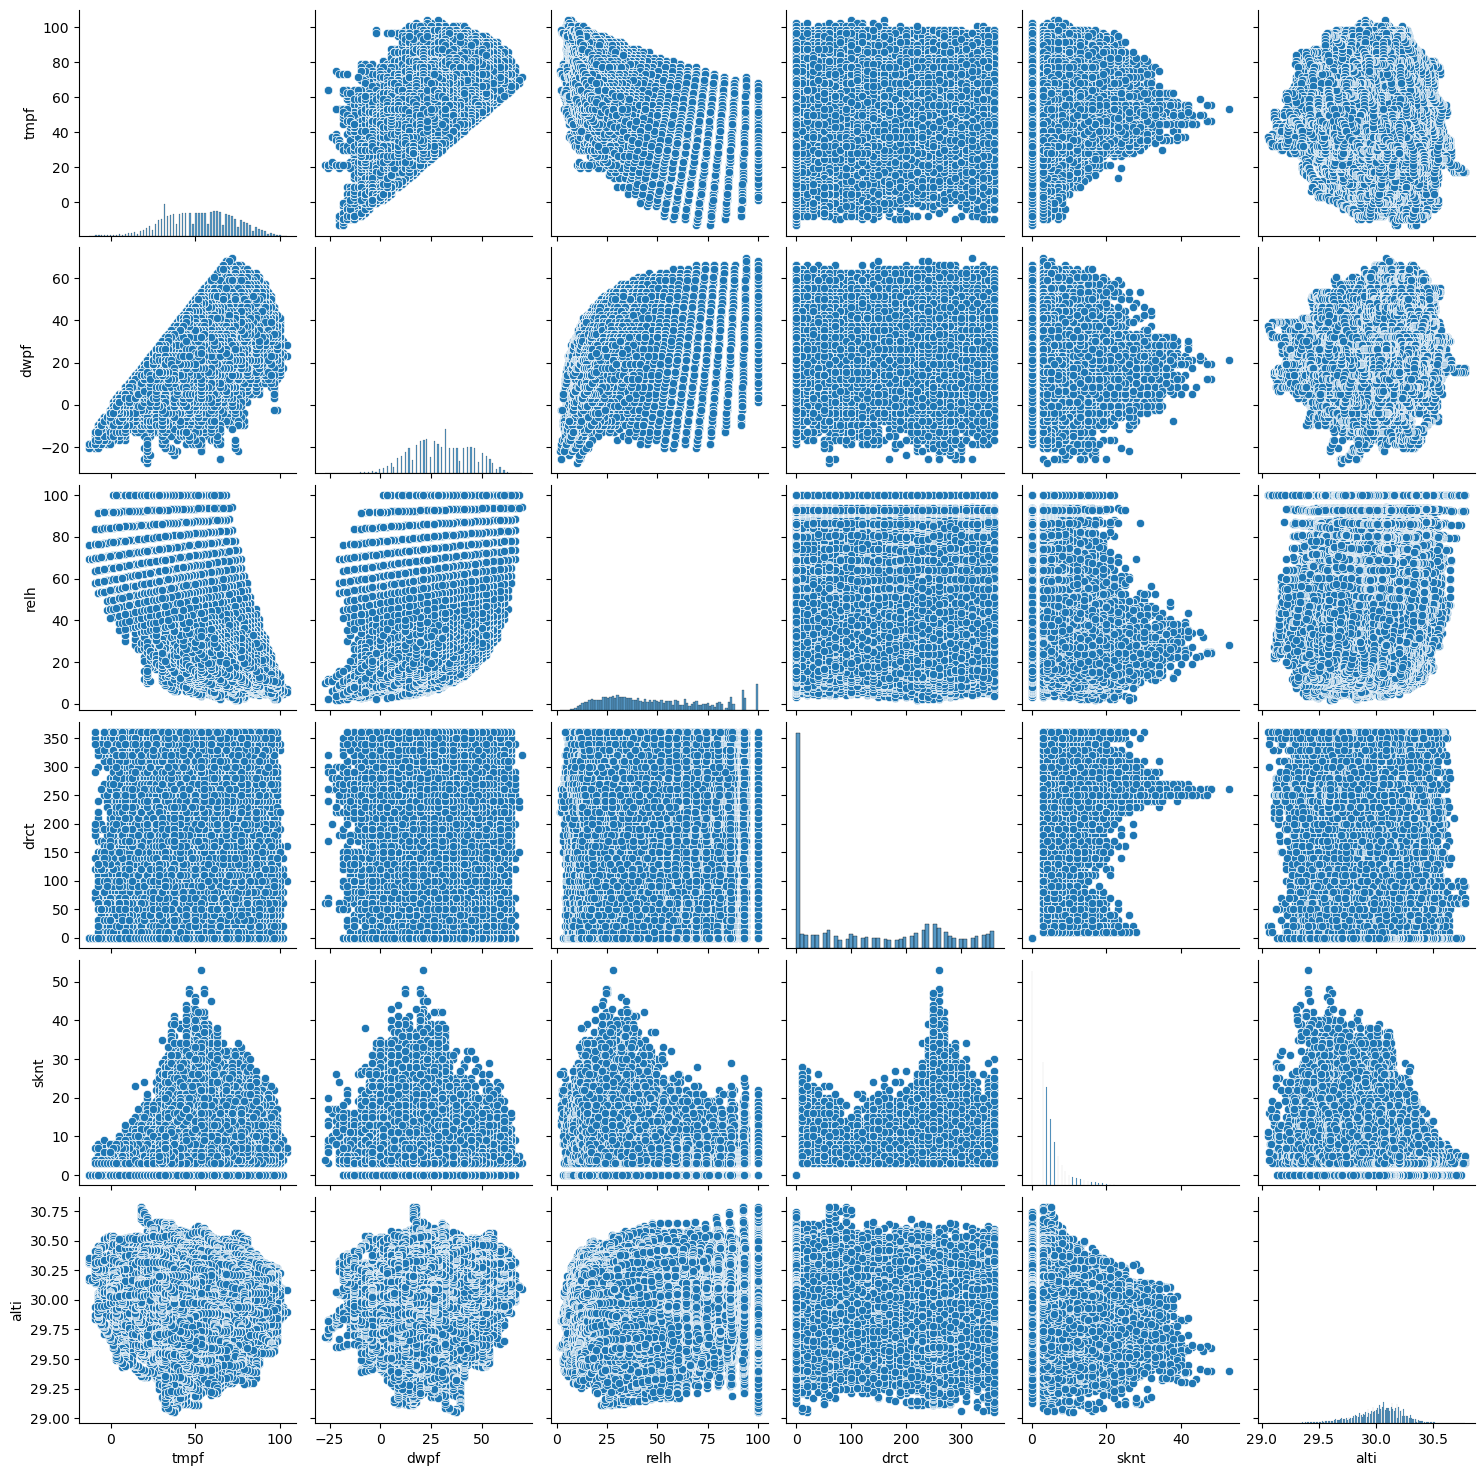

In [9]:
sns.pairplot(df)

/home/jessica/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jessica/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot:xlabel='drct', ylabel='Count'>

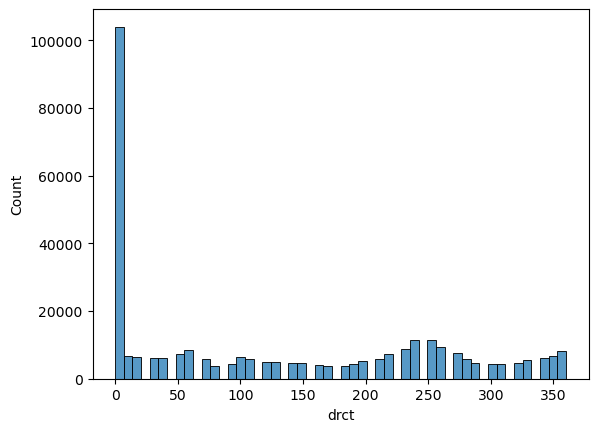

In [10]:
sns.histplot(df['drct'])

/home/jessica/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jessica/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot:xlabel='sknt', ylabel='Count'>

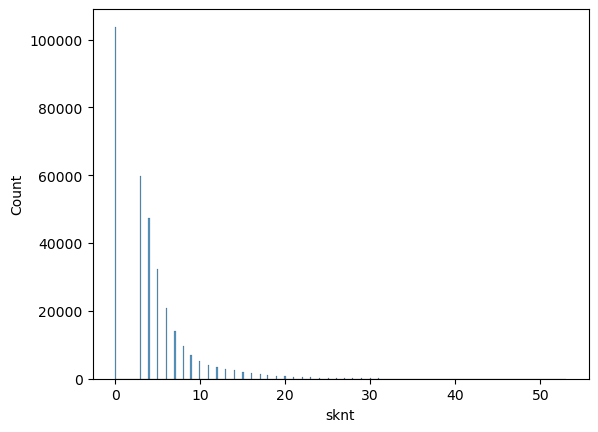

In [11]:
sns.histplot(df['sknt'])

In [12]:
import numpy as np
my_data = np.array([0.0, 140, 260, 0 , 0, 0, 0])
print(np.mean(my_data))

57.142857142857146


In [13]:
my_data[my_data == 0] = np.nan

In [14]:
np.mean(my_data)

nan

In [15]:
np.nanmean(my_data)

200.0

In [16]:
df['drct'].describe()

count    324177.000000
mean        128.663971
std         124.005116
min           0.000000
25%           0.000000
50%         100.000000
75%         240.000000
max         360.000000
Name: drct, dtype: float64

In [17]:
df['drct'] = df['drct'].replace(0, np.nan)

In [18]:
df['drct'].describe()

count    220179.000000
mean        189.436322
std         105.489163
min          10.000000
25%          90.000000
50%         210.000000
75%         270.000000
max         360.000000
Name: drct, dtype: float64

/home/jessica/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jessica/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot:xlabel='drct', ylabel='Count'>

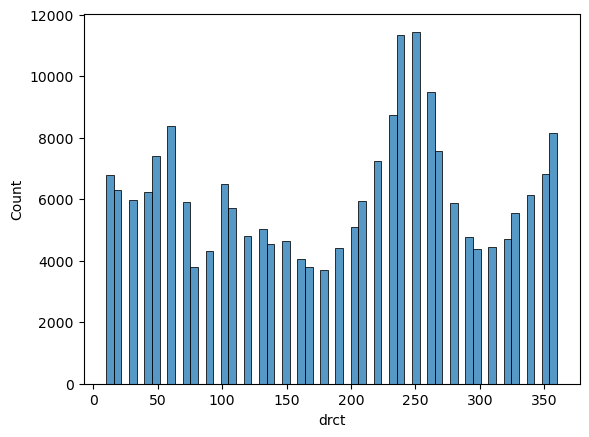

In [19]:
sns.histplot(df['drct'])

In [20]:
None == None

True

In [21]:
np.nan == np.nan

False

In [22]:
pd.NA == pd.NA

<NA>

In [23]:
np.nan is np.nan

True

In [24]:
pd.NA is pd.NA

True

In [25]:
np.nan * 1

nan

In [26]:
pd.NA * 1

<NA>

In [27]:
np.nan ** 0

1.0

In [28]:
pd.NA ** 0

1

In [29]:
1 ** np.nan

1.0

In [30]:
1 ** pd.NA

1

In [31]:
pd.isna(np.nan)

True

In [32]:
pd.isna(pd.NA)

True

In [33]:
np.nan == 1

False

In [34]:
pd.NA == 1

<NA>